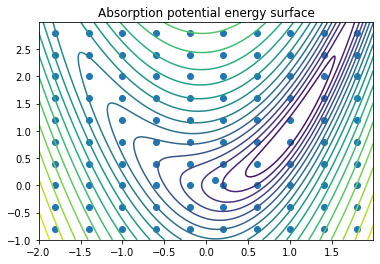

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import random

delta = 0.01 
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-1.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z = np.log((2*(Y-X **2))**2 + (1 - X)**2 + 1)
levels = np.arange(0.0, 10.0, 0.5)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 18)
plt.scatter(x_train[:,0], x_train[:,1])
#plt.scatter(x_test[:,0], x_test[:,1])
ax.set_title('Absorption potential energy surface')

plt.show()

In [3]:
def energy(x, y):
    z = np.log((2*(y-x **2))**2 + (1 - x)**2 + 1)
    return z

def force(x, y):
    x = np.array(x)
    y = np.array(y)
    
    dx = (-16*x*(y-x**2)+2*x - 2)/(4*(y-x**2)**2 + (1 - x)**2 + 1)
    dy = (8*(y - x**2))/(4*(y-x**2)**2 + (1 - x)**2 + 1)
    #vec[i] = np.sqrt(dx**2+dy**2)
    
    return [dx, dy]

In [4]:
class GP:
    "Class used for training and predicting using Gaussian process"
    def __init__ (self, l, k0, sigma): 
        self.l = l
        self.k0 = k0
        self.sigma = sigma
    def kernel(self, x, xx):
        "Calculates kernel"
        return np.exp(-(np.sum((x-xx)**2))/(2*self.l**2))
    
    def calc_K(self):
        "Calculates K matrix. xp is samples x-values"
        K =  np.array([[self.kernel(x,xx) for x in x_train] for xx in x_train])
        return K
    
    def calc_C(self, x_train):
        "Calculates C matrix. xp is sample x-values"
        K = self.calc_K()
        C = K + self.sigma**2*np.identity(len(x_train))
        return C
    
    def fitf(self, x, Cinvt):
        "returns k-vector dotted with C_inv dot sample-y"
        kvec = np.array([self.kernel(x,xx) for xx in x_train])
        return np.dot(kvec, Cinvt)
    
    def train(self, x_train, y_train):
        "xp is x-values of samples, tp is y-values of samples. Returns C invers and C invers dotted with t"
        C = self.calc_C(x_train)
        Cinv = np.linalg.inv(C)
        Cinvt = np.dot(Cinv, y_train.reshape(-1,1))
        return Cinvt
   
    def predict(self, x_train, y_train, x_test):
        "xp is x-values of sample points, tp is y-values of sample points, grid is the grid to be fitted to"  
        Cinvt = self.train(x_train, y_train)
        y_test = np.array([self.fitf(x, Cinvt) for x in x_test])
        #var_array = np.array([self.varx(x, Cinv) for x in grid])
        return y_test

In [5]:
l = 2
k0 = 0.5
sigma = 0.005

In [6]:
model = GP(l,k0,sigma)

In [7]:
x_train = np.array(np.meshgrid(np.linspace(-1.8, 1.8,10), np.linspace(-0.8, 2.8, 10))).T.reshape(-1,2)
x_train = np.append(x_train, np.array([[0.1, 0.1]]), axis = 0)
print(x_train)
y_train = np.array([energy(i[0], i[1]) for i in x_train])
print(y_train)

[[-1.80000000e+00 -8.00000000e-01]
 [-1.80000000e+00 -4.00000000e-01]
 [-1.80000000e+00 -1.11022302e-16]
 [-1.80000000e+00  4.00000000e-01]
 [-1.80000000e+00  8.00000000e-01]
 [-1.80000000e+00  1.20000000e+00]
 [-1.80000000e+00  1.60000000e+00]
 [-1.80000000e+00  2.00000000e+00]
 [-1.80000000e+00  2.40000000e+00]
 [-1.80000000e+00  2.80000000e+00]
 [-1.40000000e+00 -8.00000000e-01]
 [-1.40000000e+00 -4.00000000e-01]
 [-1.40000000e+00 -1.11022302e-16]
 [-1.40000000e+00  4.00000000e-01]
 [-1.40000000e+00  8.00000000e-01]
 [-1.40000000e+00  1.20000000e+00]
 [-1.40000000e+00  1.60000000e+00]
 [-1.40000000e+00  2.00000000e+00]
 [-1.40000000e+00  2.40000000e+00]
 [-1.40000000e+00  2.80000000e+00]
 [-1.00000000e+00 -8.00000000e-01]
 [-1.00000000e+00 -4.00000000e-01]
 [-1.00000000e+00 -1.11022302e-16]
 [-1.00000000e+00  4.00000000e-01]
 [-1.00000000e+00  8.00000000e-01]
 [-1.00000000e+00  1.20000000e+00]
 [-1.00000000e+00  1.60000000e+00]
 [-1.00000000e+00  2.00000000e+00]
 [-1.00000000e+00  2

In [8]:
model.train(x_train, y_train)

array([[  2908.07351026],
       [ -1289.52527035],
       [ -2640.48936646],
       [ -2465.19069134],
       [ -1425.93082912],
       [    46.59306636],
       [  1355.70581006],
       [  1813.37188897],
       [  1308.05688109],
       [  1166.85499978],
       [ -1982.19192357],
       [  -382.47001626],
       [  3328.66904648],
       [  5950.27117798],
       [  5877.84608548],
       [  3113.20626184],
       [  -926.27509426],
       [ -4160.17923236],
       [ -5927.82514515],
       [ -7746.41829915],
       [ -2410.17594757],
       [   420.22820414],
       [  1600.13699874],
       [ -1256.26411083],
       [ -5598.32772632],
       [ -6193.7521366 ],
       [ -1680.77761286],
       [  4188.94769324],
       [  7366.25811768],
       [  5834.24251978],
       [  -426.17605195],
       [  1113.50719739],
       [ -1164.81808957],
       [ -4485.99932621],
       [ -4327.39565298],
       [ -2267.0921532 ],
       [   -86.79395724],
       [  2499.63139203],
       [  51

In [30]:
x_test = np.array(np.meshgrid(np.linspace(-1.8, 1.8,30), np.linspace(-0.8, 2.8, 30))).T.reshape(-1,2)
x_test = np.append(x_test, np.array([[0.0,0.0]]), axis = 0)

In [31]:
predict=model.predict(x_train, y_train, x_test)
#print(predict)
# index_min = np.argmin(predict)
# print(index_min, x_test[index_min])

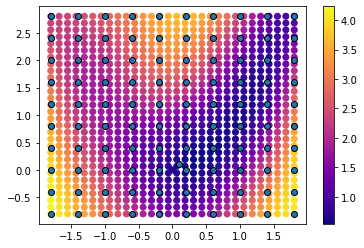

In [32]:
plt.scatter(x_test[:,0], x_test[:,1], c = predict.flatten(),  cmap='plasma')
#plt.scatter(x_train[:,0], x_train[:,1])
plt.colorbar()
plt.scatter(x_train[:,0], x_train[:,1],edgecolor='k')